In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats
from scipy import misc
from myst_nb import glue

## Method of Indicators ##

This is a powerful method for finding expected counts. It is based on the observation that among $n$ trials, the number of "good" results can be counted by first coding each "good" result as 1 and each of the other results as 0, and then adding the 1's and 0's.

If $N$ is the total number of good results among $n$ trials, then

$$
N = I_1 + I_2 + \cdots + I_n
$$

where for each $j$ in the range 1 through $n$, the random variable $I_j$ is the indicator of "the result of the $j$th trial is good". 

Now recall that if $I_A$ is the indicator of an event $A$, then $E(I_A) = P(A)$. That is, the expectation of an indicator is the probability of the event that it indicates.

So

$$
\begin{align*}
E(N) &= E(I_1) + E(I_2) + \cdots + E(I_n) \\ 
&= P(\text{result of Trial } 1 \text{ is good}) +
P(\text{result of Trial } 2 \text{ is good}) + \cdots +
P(\text{result of Trial } n \text{ is good}) \\
\end{align*}
$$

It is important to note that the additivity works regardless of whether the trials are dependent or independent. 

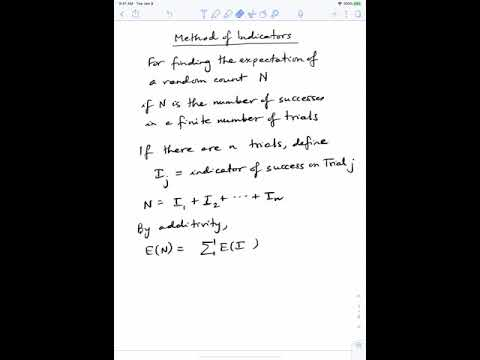

In [2]:
# VIDEO: Method of Indicators
from IPython.display import YouTubeVideo

vid_method_ind = YouTubeVideo('hOIcQUYUNsM')
glue("vid_method_ind", vid_method_ind)

```{dropdown} See More
:icon: video
{glue:}`vid_method_ind`
```

### Expectation of the Binomial ###
Let $X$ have the binomial $(n, p)$ distribution. Then $X$ can be thought of as the number of successes in $n$ i.i.d. Bernoulli $(p)$ trials, and we can write

$$
X = I_1 + I_2 + \cdots + I_n
$$

where for each $j$ in the range 1 through $n$, $I_j$ is the indicator of "Trial $j$ is a success". Thus

$$
\begin{align*}
E(X) &= E(I_1) + E(I_2) + \cdots + E(I_n) ~~~~ \text{(additivity)} \\
&= np ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ \text{(}E(I_j) = p \text{ for all } j \text{)}
\end{align*}
$$

Examples of use:
- The expected number of heads in 100 tosses of a coin is $100 \times 0.5 = 50$. 
- The expected number of heads in 25 tosses is 12.5. Remember that the expectation of an integer-valued random variable need not be an integer. 
- The expected number of times green pockets win in 20 independent spins of a roulette wheel is $20 \times \frac{2}{38} = 1.053$, roughly.

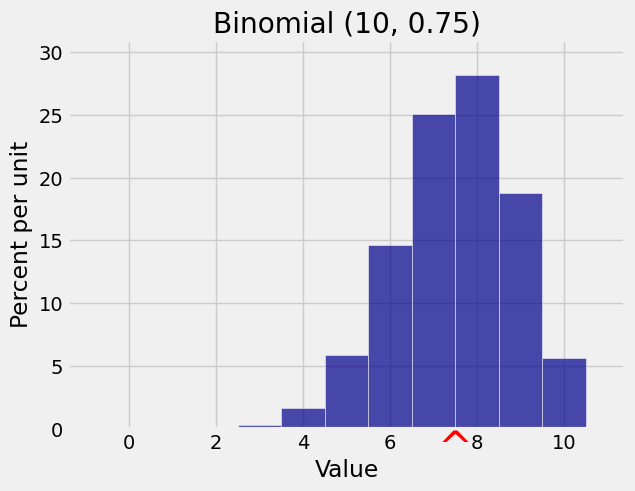

In [3]:
k = np.arange(11)
probs = stats.binom.pmf(k, 10, 0.75)
bin_10_75 = Table().values(k).probabilities(probs)
Plot(bin_10_75, show_ev=True)
plt.title('Binomial (10, 0.75)');

Notice that we didn't use independence. Additivity of expectation works whether or not the random variables being added are independent. This will be very helpful in the next example.

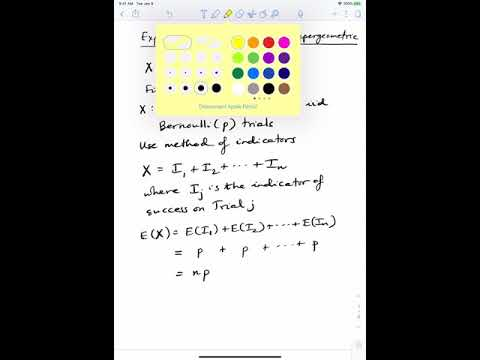

In [4]:
# VIDEO: Expectation: Binomial and Hypergeometric

vid_exp_binom_hyp = YouTubeVideo('lz-UuQqvUOE')
glue("vid_exp_binom_hyp", vid_exp_binom_hyp)

```{dropdown} See More
:icon: video
{glue:}`vid_exp_binom_hyp`
```

### Expectation of the Hypergeometric ###
Let $X$ have the hypergeometric $(N, G, n)$ distribution. Then $X$ can be thought of as the number of good elements in $n$ draws made at random without replacement from a population of $N = G+B$ elements of which $G$ are good and $B$ bad. Then

$$
X = I_1 + I_2 + \cdots + I_n
$$

where for each $j$ in the range 1 through $n$, $I_j$ is the indicator of "Draw $j$ results in a good element". Thus

$$
\begin{align*}
E(X) &= E(I_1) + E(I_2) + \cdots + E(I_n) ~~~~ \text{(additivity)} \\ \\
&= n\frac{G}{N} ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
\text{(}E(I_j) = \frac{G}{N} \text{ for all } j \text{ by symmetry)}
\end{align*}
$$

This is the same answer as for the binomial, with the population proportion of good elements $G/N$ replacing $p$.

Examples of use:
- The expected number of red cards in a bridge hand of 13 cards is $13 \times \frac{26}{52} = 6.5$. 
- The expected number of Independent voters in a simple random sample of 200 people drawn from a population in which 10% of the voters are Independent is $200 \times 0.1 = 20$. 

These answers are intuitively clear, and we now have a theoretical justification for them.

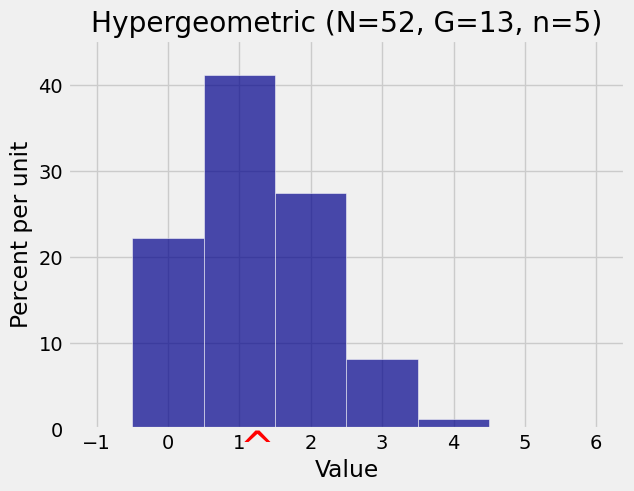

In [5]:
# Number of hearts in a poker hand 
N = 52
G = 13
n = 5
k = np.arange(6)
probs = stats.hypergeom.pmf(k, N, G, n)
hyp_dist = Table().values(k).probabilities(probs)
Plot(hyp_dist, show_ev=True)
plt.title('Hypergeometric (N=52, G=13, n=5)');

```{admonition} Quick Check
A deck contains $40$ blue cards and $60$ gold cards. Ten cards are drawn at random. Find the expected number of blue cards drawn

(a) if the cards are drawn with replacement

(b) if the cards are drawn without replacement

```

```{admonition} Answer
:class: dropdown
(a) $4$ by the binomial expectation formula

(b) $4$ by the hypergeometric expectation formula

```

### Number of Missing Classes ###
A population consists of four classes of individuals, in the proportions 0.4, 0.3, 0.2, and 0.1. A random sample of $n$ individuals is chosen so that the choices are mutually independent. What is the expected number of classes that are missing in the sample?

If $M$ is the number of missing classes, then

$$
M = I_1 + I_2 + I_3 + I_4
$$

where for each $j$, $I_j$ is the indicator of "Class $j$ is missing in the sample". 

For Class $j$ to be missing in the sample, all $n$ selected individuals have to be from the other classes. Thus

$$
E(M) = E(I_1) + E(I_2) + E(I_3) + E(I_4)
= 0.6^n + 0.7^n + 0.8^n + 0.9^n
$$

The four indicators aren't independent but that doesn't affect the additivity of expectation.

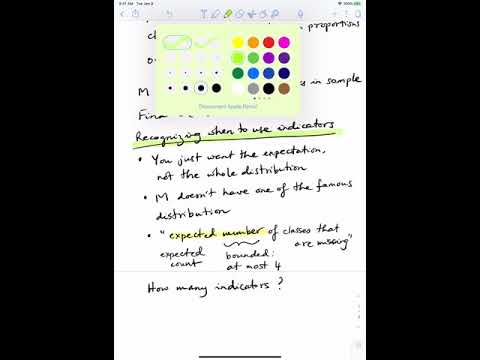

In [6]:
# VIDEO: Applying the Method of Indicators
vid_apply_moi = YouTubeVideo('mxj4Gr_QUCM')
glue("vid_apply_moi", vid_apply_moi)

```{dropdown} See More
:icon: video
{glue:}`vid_apply_moi`
```

```{admonition} Quick Check
A deck of 52 cards is dealt (at random without replacement) to four players, so that each player gets a hand of 13 cards. To find the expected number of hands that have no aces, which would you use?

(i) Four indicators, one for each ace

(ii) Four indicators, one for each hand

(iii) Thirteen indicators, one for each card in a hand

(iv) Fifty-two indicators, one for each card in the deck

```

```{admonition} Answer
:class: dropdown
(ii)

```